In [1]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('info.csv')

# Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [3]:
df.describe()


,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


Crea almenys una visualització per:

 Una variable categòrica (Districte o Barri)

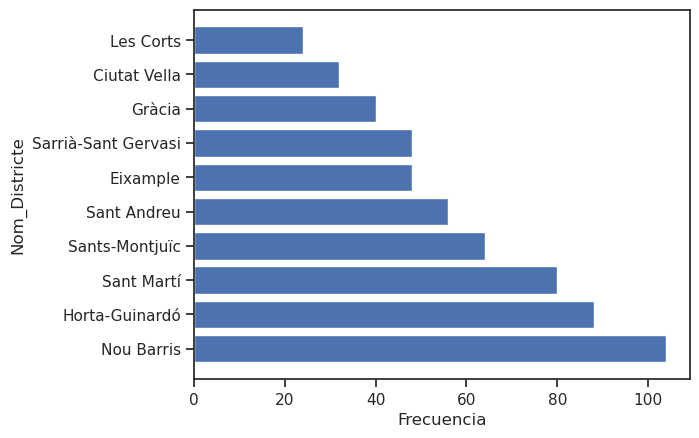

In [31]:

plt.barh(df['Nom_Districte'].value_counts().index, df['Nom_Districte'].value_counts().values)
plt.xlabel('Frecuencia')
plt.ylabel('Nom_Districte')
plt.savefig('unaVar.png')
plt.show()


Una variable numèrica (Preu)

<AxesSubplot:xlabel='Preu', ylabel='Density'>

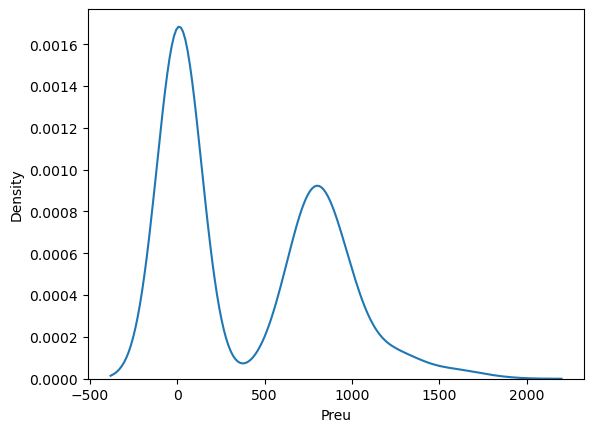

In [5]:
#canviem els valors no numèrics per zeros
df['Preu'] = df['Preu'].replace("'--", 0)
df['Preu'] = df['Preu'].replace("--", 0)
df["Preu"] = pd.to_numeric(df["Preu"])
sns.kdeplot(df['Preu'])



Una variable numèrica i una categòrica (Districte i Preu)

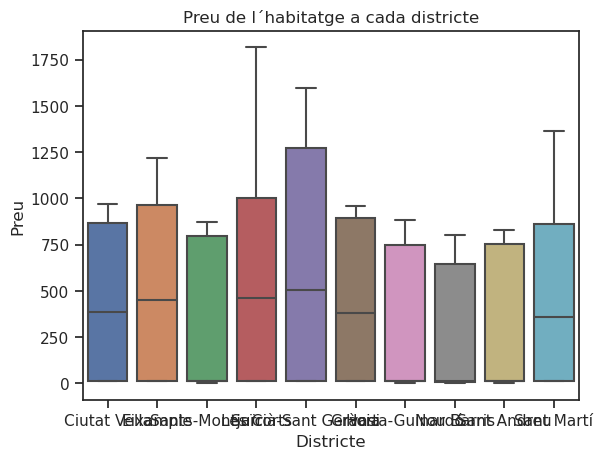

In [25]:
g = sns.boxplot(x='Nom_Districte', y='Preu', data=df)
plt.xlabel('Districte')
plt.ylabel('Preu')
plt.title('Preu de l´habitatge a cada districte')
g.figure.savefig('vnumIcat.png')
plt.show()

Dues variables numèriques (Any o Trimestre i Preu)

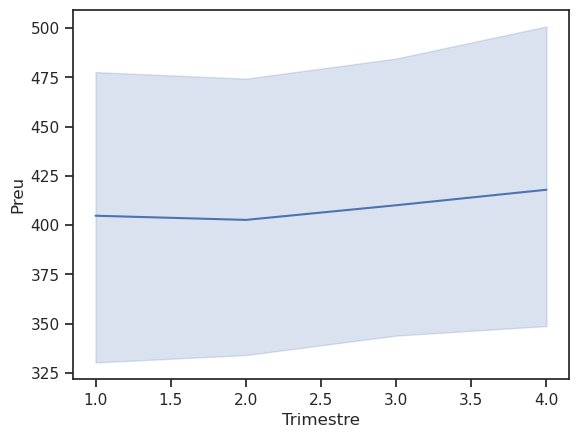

In [26]:
g= sns.lineplot(data=df, x='Trimestre', y='Preu')
g.figure.savefig('duesNum.png')

Tres variables (Barri o Districte, Trimestre i Preu)

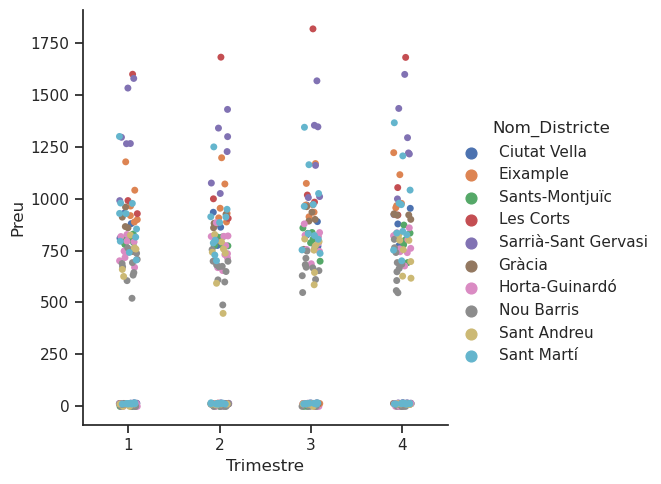

In [27]:
g=sns.catplot(x='Trimestre', y='Preu', hue='Nom_Districte', data=df)
g.figure.savefig('tresVar.png')

# Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

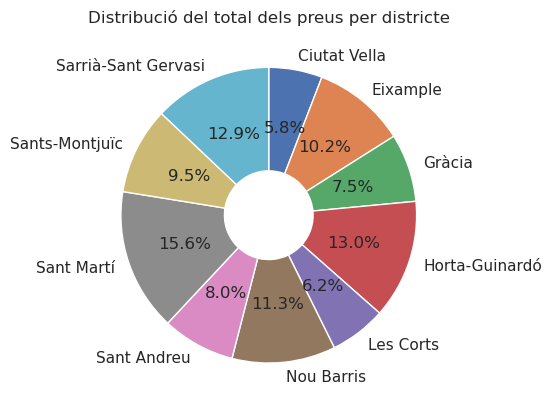

In [28]:
habitatge = df.groupby('Nom_Districte')['Preu'].sum()
fig, ax = plt.subplots()
labels = habitatge.index
sizes = habitatge.values
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'width': 0.7})
ax.set_title('Distribució del total dels preus per districte')
fig.figure.savefig('exer3.png')
plt.show()